In [180]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

# Homelessness data

we dowloaded the '2007-2018-PIT-Counts-by-State' (XLSX) file from https://www.hudexchange.info/resource/5783/2018-ahar-part-1-pit-estimates-of-homelessness-in-the-us/

In [181]:
#we load the data
df = pd.read_excel('Data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name=None)
print(type(df))

<class 'collections.OrderedDict'>


In [182]:
#quick visualisation
df

OrderedDict([('Change',     state  Change in Total Homelessness, 2017-2018  \
              0      AK                                 0.092683   
              1      AL                                -0.094648   
              2      AR                                 0.099311   
              3      AZ                                 0.102604   
              4      CA                                -0.011860   
              5      CO                                -0.007587   
              6      CT                                 0.173554   
              7      DC                                -0.076141   
              8      DE                                 0.088531   
              9      FL                                -0.036036   
              10     GA                                -0.066346   
              11     GU                                 0.002347   
              12     HI                                -0.095568   
              13     IA               

We can see that there are a lot of informations. We will try to keep only the 'overall homeless', 'Homeless Family Households' and 'Homeless Veterans' count of each years. We will start with the year 2018 to have a guess on the procedure.

## 2018 dataset:

In [183]:
#load the corresponding datasheet
df2018 = pd.read_excel('Data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2018')
df2018.head()

,State,Number of CoCs,"Overall Homeless, 2018","Sheltered ES Homeless, 2018","Sheltered TH Homeless, 2018","Sheltered SH Homeless, 2018","Sheltered Total Homeless, 2018","Unsheltered Homeless, 2018","Homeless Individuals, 2018","Sheltered ES Homeless Individuals, 2018",...,"Homeless Parenting Youth Age 18-24, 2018","Sheltered ES Homeless Parenting Youth Age 18-24, 2018","Sheltered TH Homeless Parenting Youth Age 18-24, 2018","Sheltered Total Homeless Parenting Youth Age 18-24, 2018","Unsheltered Homeless Parenting Youth Age 18-24, 2018","Homeless Children of Parenting Youth, 2018","Sheltered ES Homeless Children of Parenting Youth, 2018","Sheltered TH Homeless Children of Parenting Youth, 2018","Sheltered Total Homeless Children of Parenting Youth, 2018","Unsheltered Homeless Children of Parenting Youth, 2018"
0,AK,2,2016,1248,459,0,1707,309,1434,953,...,25,14,9,23,2,26,14,10,24,2
1,AL,8,3434,1519,865,40,2424,1010,2570,1057,...,27,11,8,19,8,36,16,13,29,7
2,AR,7,2712,933,516,6,1455,1257,2280,708,...,8,5,2,7,1,11,7,2,9,2
3,AZ,3,9865,3615,2144,40,5799,4066,7259,2327,...,63,19,35,54,9,81,28,45,73,8
4,CA,43,129972,27475,12737,217,40429,89543,109008,16507,...,1077,567,389,956,121,1215,631,464,1095,120


In [184]:
#select the wanted columns
df2018filtered = df2018[["State", "Overall Homeless, 2018",\
                         "Homeless Family Households, 2018",\
                         "Homeless Veterans, 2018"]]
df2018filtered.head()

,State,"Overall Homeless, 2018","Homeless Family Households, 2018","Homeless Veterans, 2018"
0,AK,2016,193,132
1,AL,3434,280,339
2,AR,2712,147,251
3,AZ,9865,792,893
4,CA,129972,6702,10836


There are some "errores". For example DC (==Washington, D.C.), GU (==Guam) are not states so we will remove it.  
(a list of states and territories can be found <a href="https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations" target="_blank">here</a>.)

In [185]:
#removing unwanted areas
df2018filtered = df2018filtered.drop(df2018filtered[np.isin(df2018filtered["State"], ['DC', 'GU', 'MP', 'PR', 'VI', 'Total'])].index)

We want the full name of the states. We found the '50_us_states_all_data.csv' file on https://scottontechnology.com/list-of-50-us-states-in-excel/ that will help us to transform the names of the states

In [186]:
#load the csv file for the states names
statesNamesDf = pd.read_csv("Data/50_us_states_all_data.csv", header=None,\
                    names=['useless1', 'fullName', 'abreviation', 'useless2'])
statesNamesDf.head()

,useless1,fullName,abreviation,useless2
0,ALABAMA,Alabama,AL,Ala.
1,ALASKA,Alaska,AK,Alaska
2,ARIZONA,Arizona,AZ,Ariz.
3,ARKANSAS,Arkansas,AR,Ark.
4,CALIFORNIA,California,CA,Calif.


In [187]:
#we select the wanted columns and create a numpy array
statesNamesDfFiltered = statesNamesDf[["fullName", 'abreviation']].to_numpy()
statesNamesDfFiltered

array([['Alabama', 'AL'],
       ['Alaska', 'AK'],
       ['Arizona', 'AZ'],
       ['Arkansas', 'AR'],
       ['California', 'CA'],
       ['Colorado', 'CO'],
       ['Connecticut', 'CT'],
       ['Delaware', 'DE'],
       ['Florida', 'FL'],
       ['Georgia', 'GA'],
       ['Hawaii', 'HI'],
       ['Idaho', 'ID'],
       ['Illinois', 'IL'],
       ['Indiana', 'IN'],
       ['Iowa', 'IA'],
       ['Kansas', 'KS'],
       ['Kentucky', 'KY'],
       ['Louisiana', 'LA'],
       ['Maine', 'ME'],
       ['Maryland', 'MD'],
       ['Massachusetts', 'MA'],
       ['Michigan', 'MI'],
       ['Minnesota', 'MN'],
       ['Mississippi', 'MS'],
       ['Missouri', 'MO'],
       ['Montana', 'MT'],
       ['Nebraska', 'NE'],
       ['Nevada', 'NV'],
       ['New Hampshire', 'NH'],
       ['New Jersey', 'NJ'],
       ['New Mexico', 'NM'],
       ['New York', 'NY'],
       ['North Carolina', 'NC'],
       ['North Dakota', 'ND'],
       ['Ohio', 'OH'],
       ['Oklahoma', 'OK'],
       ['Oregon', 'OR'

In [188]:
#we define a function to transform abreviation to full names
def switchAbrToFull(elt, listSwitch):
    index = int(np.where(listSwitch[:,1]==elt)[0])
    return listSwitch[index][0]

#we test the function
switchAbrToFull('NY', statesNamesDfFiltered)

'New York'

In [189]:
#finaly we apply the switchAbrToFull to have proper names for each rows
df2018Final = df2018filtered.copy()

df2018Final.State = df2018Final.State.apply(lambda x : switchAbrToFull(x, statesNamesDfFiltered))
df2018Final

,State,"Overall Homeless, 2018","Homeless Family Households, 2018","Homeless Veterans, 2018"
0,Alaska,2016,193,132
1,Alabama,3434,280,339
2,Arkansas,2712,147,251
3,Arizona,9865,792,893
4,California,129972,6702,10836
5,Colorado,10857,990,1073
6,Connecticut,3976,553,190
8,Delaware,1082,125,70
9,Florida,31030,2757,2543
10,Georgia,9499,812,705


### visualization of the results:

interactive visualization using plotly:

In [190]:
#setting the scatter points values
xAxe = df2018Final["Overall Homeless, 2018"].tolist() 
yAxe = np.zeros(len(xAxe))
annotation = df2018Final["State"].tolist()

fig = go.Figure()

#plotting the scatter plot (blu points)
fig.add_trace(go.Scatter(
    x=xAxe,
    y=yAxe,
    mode="markers",
    name="",
    text=annotation,
    textposition="bottom center",
))

#adding title, axis labels and changing plot size
fig.update_layout(title_text='visualize homeless repartition by states:',        
        xaxis_title='number of homeless people by states',
)

#increasing scatter points size
fig.update_traces(marker=dict(size=12))
#hiding y axe
fig.update_yaxes(showticklabels=False)

fig.show()

since plotly don't works wery well on github (and a scatterplot is not the best plot), we provided also a Pie Chart.

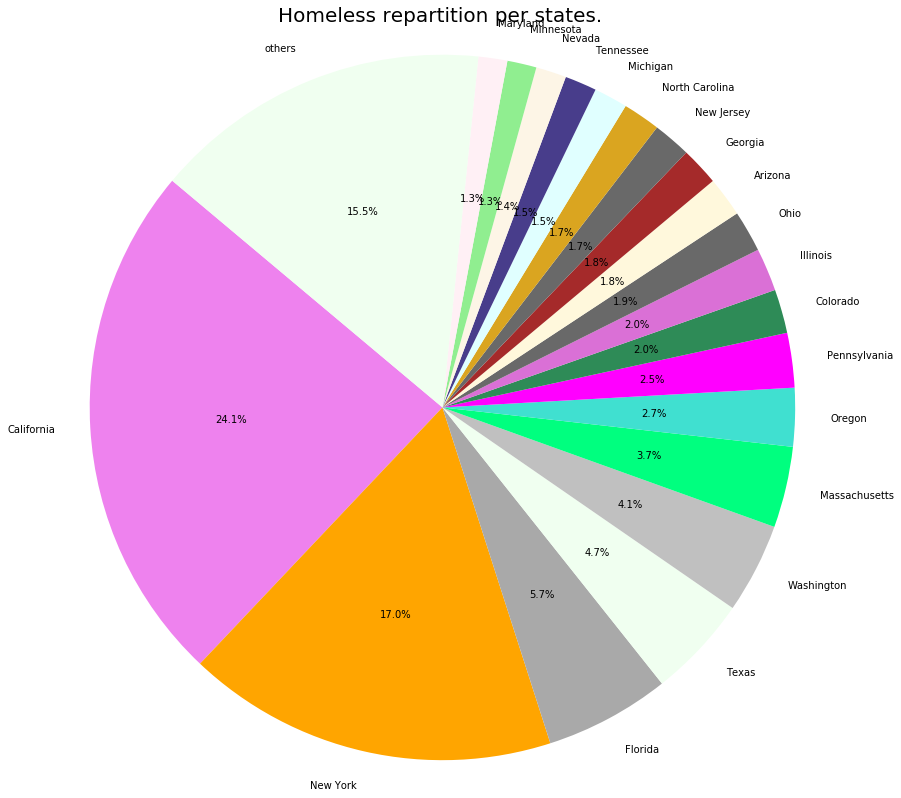

In [191]:
#only show the top 20 states otherwise names will overwrite
orderedStates = df2018Final[["State", "Overall Homeless, 2018"]]\
                        .sort_values('Overall Homeless, 2018', ascending = False)
#select top 20
top20 = orderedStates[:20].copy()
#create a df combining all states that are not in top 20
others = pd.DataFrame(data = {
    'State' : ['others'],
    'Overall Homeless, 2018' : [orderedStates['Overall Homeless, 2018'][20:].sum()]
})
#combining top20 and the other states(represented in a single row called 'others')
top20AndOther = pd.concat([top20, others])

#plot the Pie Chart
fig, ax = plt.subplots(figsize=(14,14))
#set title
ax.set_title('Homeless repartition per states.', size=20)

# Data to plot
labels = top20AndOther["State"].tolist()
sizes = top20AndOther["Overall Homeless, 2018"].tolist() 
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(labels))

# Plot
ax.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

We can see that New York and California have more than 40% of the entire USA homeless people in 2018!

## Merging all years

In [192]:
output = df2018Final.copy()

years = np.arange(2007, 2018)[::-1]
print(years)

[2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007]


In [193]:
#we do the same computation as done for year 201 to all years in the 'years' list
for year in years:
    #load the corresponding excel sheet
    df = pd.read_excel('Data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name=str(year))
    #take wanted columns
    dfFiltered = df[["State", "Overall Homeless, "+str(year),\
                         "Homeless Family Households, "+str(year),\
                         "Homeless Veterans, "+str(year)]]
    #remove unwanted rows
    dfFiltered = dfFiltered.drop(dfFiltered[np.isin(dfFiltered["State"], ['DC', 'GU', 'MP', 'PR', 'VI', 'Total'])].index)
    #go from abreviation to state name
    dfFiltered.State = dfFiltered.State.apply(lambda x : switchAbrToFull(x, statesNamesDfFiltered))
    #add this year to the datafram
    output = pd.merge(output, dfFiltered, on ='State')

output

,State,"Overall Homeless, 2018","Homeless Family Households, 2018","Homeless Veterans, 2018","Overall Homeless, 2017","Homeless Family Households, 2017","Homeless Veterans, 2017","Overall Homeless, 2016","Homeless Family Households, 2016","Homeless Veterans, 2016",...,"Homeless Veterans, 2010","Overall Homeless, 2009","Homeless Family Households, 2009","Homeless Veterans, 2009","Overall Homeless, 2008","Homeless Family Households, 2008","Homeless Veterans, 2008","Overall Homeless, 2007","Homeless Family Households, 2007","Homeless Veterans, 2007"
0,Alaska,2016,193,132,1845,165,124,1940,135,168,...,300,1992,237,259,1646,172,218,1642,190,203
1,Alabama,3434,280,339,3793,262,269,4111,356,373,...,1089,6080,509,1063,5387,483,801,5452,466,974
2,Arkansas,2712,147,251,2467,121,239,2463,191,222,...,362,2852,234,249,3255,285,235,3836,324,287
3,Arizona,9865,792,893,8947,689,970,9707,917,1036,...,2230,14721,1406,2343,12488,1277,736,14646,1459,869
4,California,129972,6702,10836,131532,7083,11436,118142,6764,9612,...,17604,123678,8613,17973,136531,8924,17276,138986,8733,16701
5,Colorado,10857,990,1073,10940,993,1078,10550,1200,1181,...,1316,15268,2224,1471,14747,2457,1608,14225,2704,1541
6,Connecticut,3976,553,190,3388,392,191,3902,449,216,...,483,4605,624,462,4627,623,524,4482,442,436
7,Delaware,1082,125,70,994,129,91,1070,108,107,...,74,1130,117,100,933,85,127,1061,119,204
8,Florida,31030,2757,2543,32190,2846,2817,33559,3031,2902,...,7794,55599,7751,7135,50158,6296,5780,48069,5618,5841
9,Georgia,9499,812,705,10174,1019,712,12909,1145,1055,...,2766,20360,1895,2760,19095,1722,3336,19639,2177,2243


In [177]:
#we check for null values
output.isnull().values.any()

False

## visualization over the years

We will first visualize the evolution of the californa overall Homeless population evolution sinceit is the highest in the USA.

In [172]:
colNum = np.concatenate(([0],np.arange(1,37,3)))
colNum

array([ 0,  1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34])

In [173]:
#select wanted columns
OverallHomeless = output.iloc[: , colNum]
OverallHomeless.head()

,State,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012","Overall Homeless, 2011","Overall Homeless, 2010","Overall Homeless, 2009","Overall Homeless, 2008","Overall Homeless, 2007"
0,Alaska,2016,1845,1940,1956,1784,1946,1913,2128,1863,1992,1646,1642
1,Alabama,3434,3793,4111,3970,4561,4689,5209,5558,6046,6080,5387,5452
2,Arkansas,2712,2467,2463,2560,2936,3812,4214,3424,2762,2852,3255,3836
3,Arizona,9865,8947,9707,9896,10495,10562,11302,10504,13711,14721,12488,14646
4,California,129972,131532,118142,115738,113952,118552,120098,125128,123480,123678,136531,138986


In [174]:
#we select the california row and reverse it to go from 2007 to 2018
california = np.array(OverallHomeless.loc[OverallHomeless.State == 'California'].set_index('State').T.California.tolist())[::-1]
california

array([138986, 136531, 123678, 123480, 125128, 120098, 118552, 113952,
       115738, 118142, 131532, 129972])

Text(0, 0.5, 'Nbr of homeless people.')

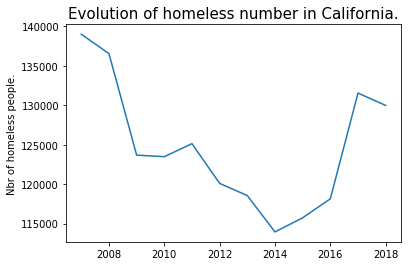

In [175]:
#we visualize it's evolution through the years
fig, ax = plt.subplots()

ax.plot( np.arange(2007, 2019), california)
ax.set_title('Evolution of homeless number in California.', size=15)
ax.set_ylabel('Nbr of homeless people.')

We can see that it's evolution is stable, even decreasing a bit since in 11 years, the number of homeless people decreased by 9014

If we do the same for New York:

Text(0, 0.5, 'Nbr of homeless people.')

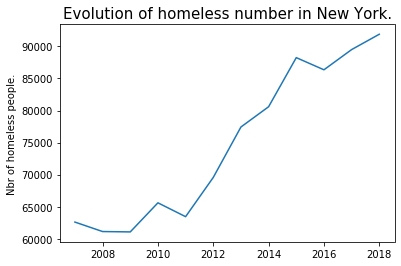

In [176]:
#we select the New York row and reverse it to go from 2007 to 2018
NewYork = np.array(OverallHomeless.loc[OverallHomeless.State == 'New York'].set_index('State').T["New York"].tolist())[::-1]
#we visualize the evolution
fig, ax = plt.subplots()

ax.plot( np.arange(2007, 2019), NewYork)
ax.set_title('Evolution of homeless number in New York.', size=15)
ax.set_ylabel('Nbr of homeless people.')

We can see that not like california, in New York, the number of homless people is increasing. Going from 62'601 in 2007 to 91'897 in 2018.

# Conclusion

We now have a datafram (i.e. output) with the number of homeless people for all the USA states and it's evolution through time that will surely help us to developpe our developmental index.